In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
activity = pd.read_csv('../datasets/activity.csv')
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [14]:
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
X = activity[["Acc (vertical)"]]
y = activity["LyingDown"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [18]:
clf = LogisticRegression().fit(X_train,y_train)

In [19]:
clf.coef_

array([[-0.1177471]])

In [20]:
clf.intercept_

array([6.10180958])

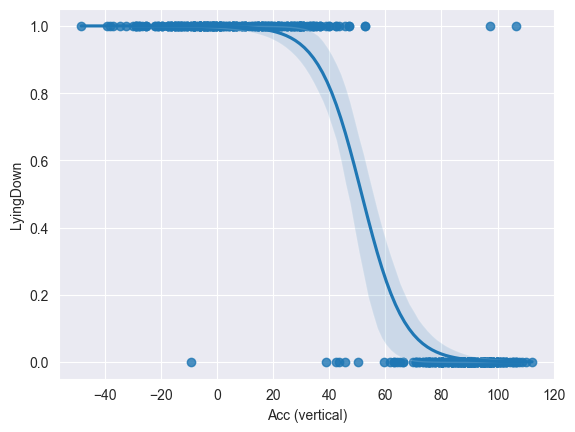

In [26]:
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)
plt.show()

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [36]:
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

#### creating a confusion metrix
for representing of how accurate a classifier is a predicting the labels for a categorical variable

In [39]:
import sklearn.metrics as metrics

In [41]:
# calculating the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

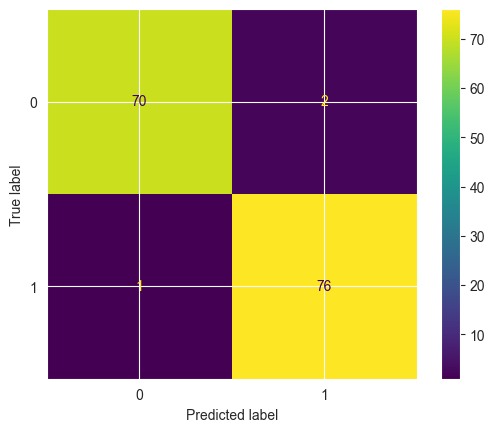

In [43]:
# creating the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

disp.plot();